In [18]:
#27 Feb 2026

In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv('/content/Credit_Card_Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [24]:
df.drop(columns=['RowNumber',	'CustomerId',	'Surname'], inplace=True)

In [25]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
df=pd.get_dummies(df, columns=['Geography',	'Gender'], drop_first=True)

In [37]:
x=df.drop('Exited', axis=1)
y=df['Exited']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=5)

In [39]:
x_train.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Geography_Germany,bool
Geography_Spain,bool


In [58]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
xtrain=ss.fit_transform(x_train)
xtest=ss.transform(x_test)

In [59]:
#!pip install -q tf-keras

In [60]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [61]:
model=Sequential()

model.add(Dense(3, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [53]:
model.fit(xtrain, y_train, epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6255
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5107
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4818
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4526
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4501
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4415
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4548
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4302
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4363
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4325
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4322
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4281
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4237
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4351
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

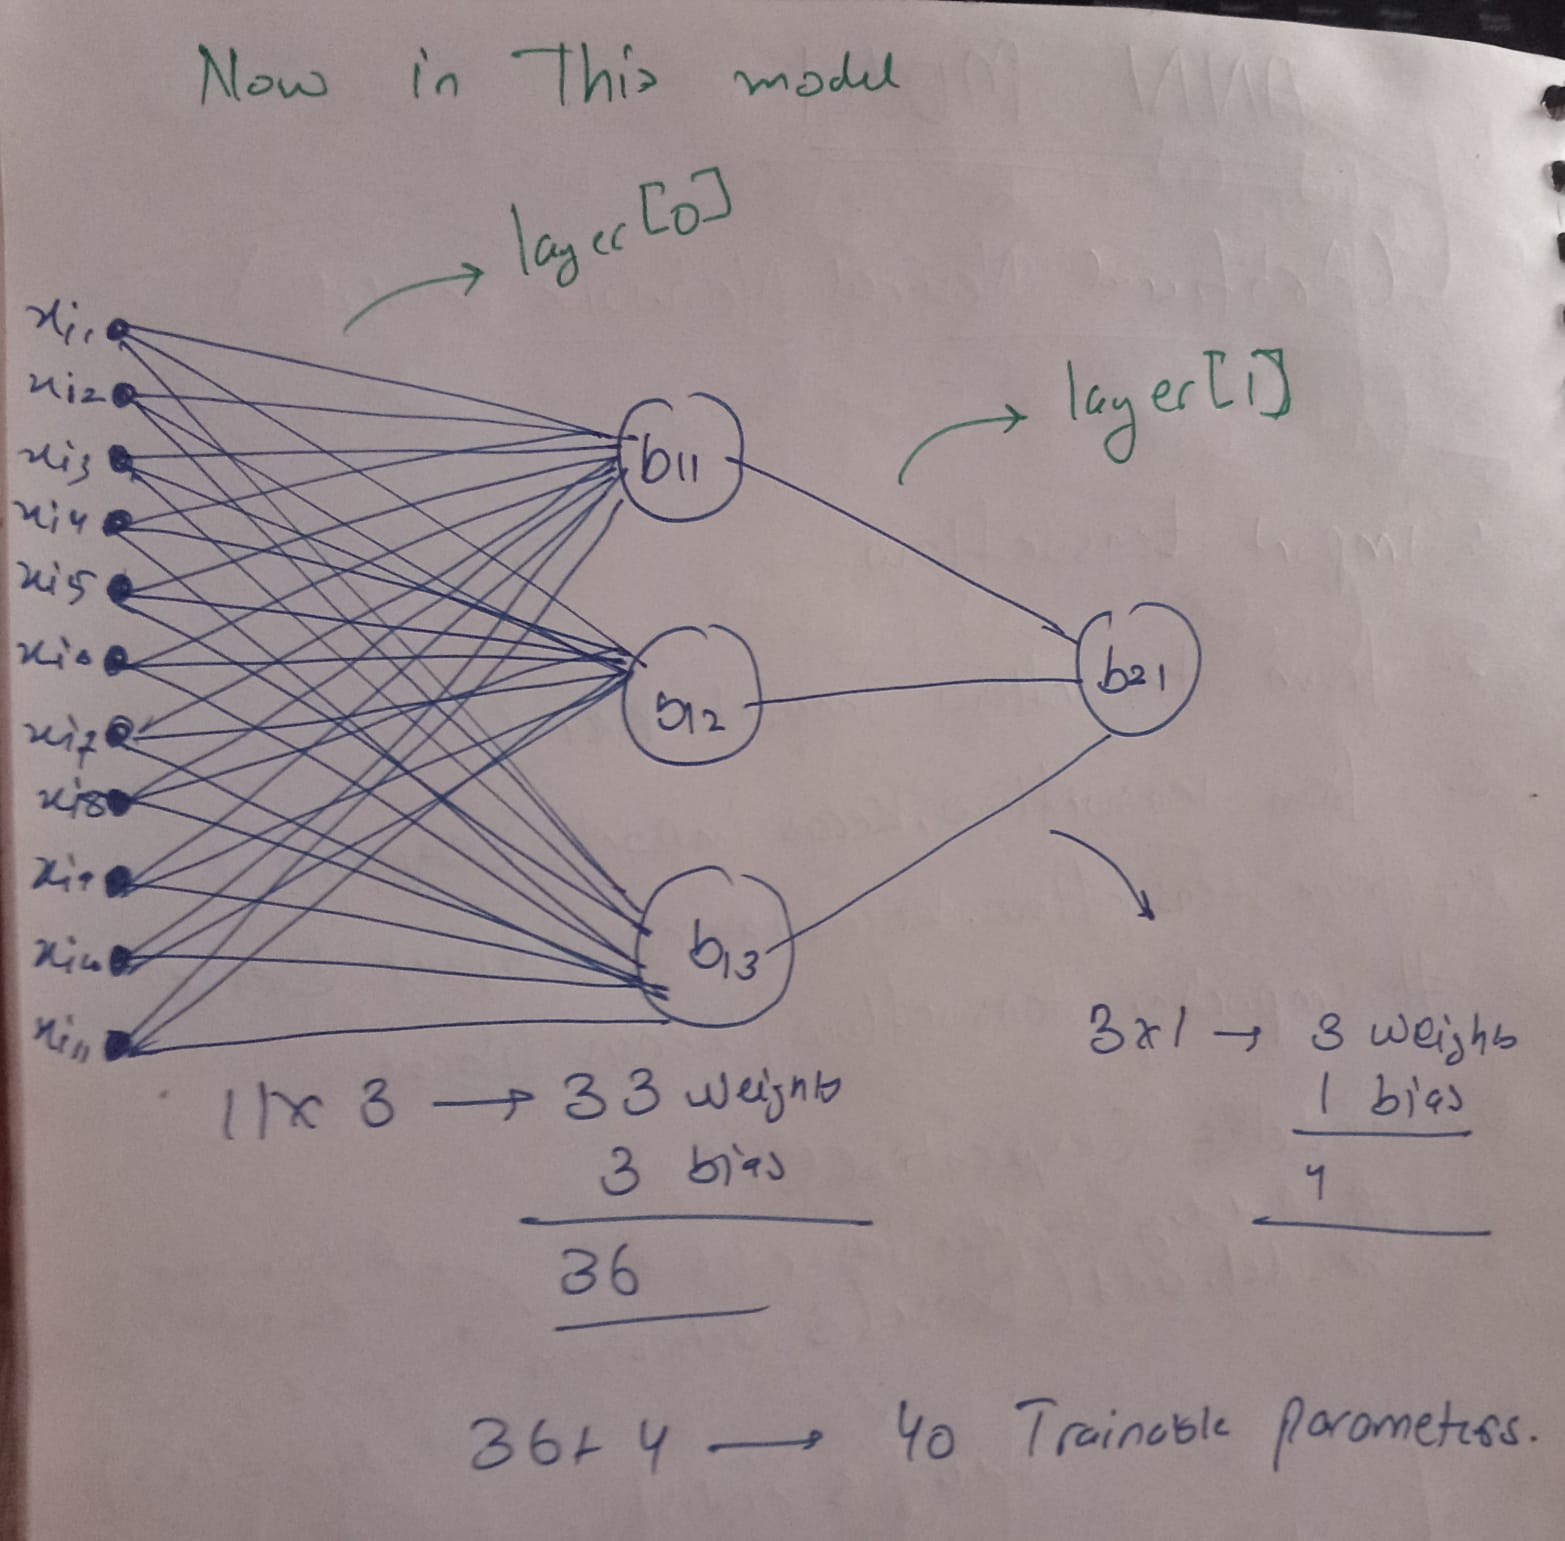

**These are the value of the weights and bias of 1st layer which is hidden layer having 33 weights and bias**

In [55]:
model.layers[0].get_weights()

[array([[ 0.09698745,  0.06646661, -0.18228187],
        [-1.7271407 , -2.6170287 ,  0.02914173],
        [-0.04081577,  0.17575343, -0.08795845],
        [-0.4206655 , -0.07673698,  0.5726495 ],
        [ 0.14502352,  0.12933826, -0.47917768],
        [ 0.09596232, -0.08416206,  0.09430449],
        [ 0.8654984 ,  0.284835  , -1.6664106 ],
        [-0.1288579 , -0.0242367 , -0.10179701],
        [-0.60049784, -0.633741  ,  0.46318635],
        [ 0.29350117, -0.15247938,  0.17995656],
        [ 0.60541517,  0.4474174 , -0.09498218]], dtype=float32),
 array([ 0.63467443,  0.5195508 , -0.29992437], dtype=float32)]

**These are the value of 2nd layer which is output layer having 3 weights and 1 bias**

In [56]:
model.layers[1].get_weights()

[array([[-1.1707798],
        [-1.6741383],
        [ 0.6021958]], dtype=float32),
 array([-0.2043716], dtype=float32)]

In [69]:
y_log=model.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
y_pred=np.where(y_log>0.5,1,0)

In [73]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.638


**We can also improve our neural network by changing activation, layers, nodes**

In [74]:
model2=Sequential()

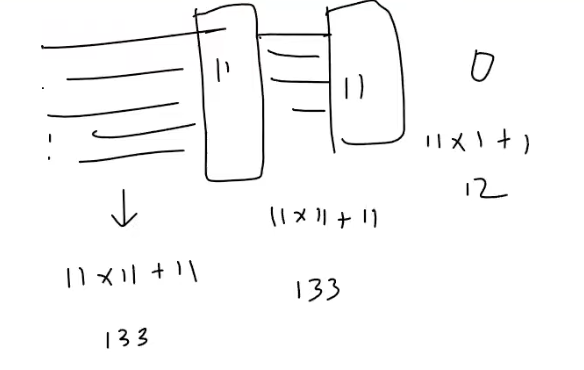

In [75]:
# 11 input columns
model2.add(Dense(11, activation='sigmoid', input_dim=11)) # Hidden layer 1(121 weights, 11 bias) 132
model2.add(Dense(11, activation='sigmoid')) # Hidden layer 2 (121 weights, 11 bias) 132
model2.add(Dense(1, activation='sigmoid')) # Output Layer (11 weights, 1 bias) 12

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [87]:
history=model2.fit(xtrain, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8659 - loss: 0.3243 - val_accuracy: 0.8838 - val_loss: 0.3156
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8564 - loss: 0.3459 - val_accuracy: 0.8856 - val_loss: 0.3149
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8632 - loss: 0.3290 - val_accuracy: 0.8838 - val_loss: 0.3176
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8573 - loss: 0.3380 - val_accuracy: 0.8850 - val_loss: 0.3144
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8606 - loss: 0.3307 - val_accuracy: 0.8869 - val_loss: 0.3131
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8551 - loss: 0.3437 - val_accuracy: 0.8856 - val_loss: 0.3135
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8479 - loss: 0.3532 - val_accuracy: 0.8856 - val_loss: 0.3143
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8589 - loss: 0.3301 - val_accuracy: 0.

In [83]:
y_lg=model2.predict(xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [85]:
y_pred1=np.where(y_lg>0.5,1,0)

In [86]:
accuracy_score(y_test, y_pred1)

0.847

In [88]:
import matplotlib.pyplot as plt

In [89]:
history.history

{'accuracy': [0.8587499856948853,
  0.8595312237739563,
  0.8589062690734863,
  0.8595312237739563,
  0.8595312237739563,
  0.859375,
  0.8590624928474426,
  0.858593761920929,
  0.858593761920929,
  0.8579687476158142,
  0.8579687476158142,
  0.8584374785423279,
  0.8579687476158142,
  0.858593761920929,
  0.8589062690734863,
  0.8592187762260437,
  0.8589062690734863,
  0.8584374785423279,
  0.8610937595367432,
  0.8584374785423279,
  0.8607812523841858,
  0.8595312237739563,
  0.8604687452316284,
  0.8604687452316284,
  0.8615624904632568,
  0.8587499856948853,
  0.8610937595367432,
  0.8604687452316284,
  0.8600000143051147,
  0.8604687452316284,
  0.8607812523841858,
  0.8607812523841858,
  0.8618749976158142,
  0.8609374761581421,
  0.8595312237739563,
  0.8606250286102295,
  0.8598437309265137,
  0.8620312213897705,
  0.8607812523841858,
  0.8618749976158142,
  0.8621875047683716,
  0.8617187738418579,
  0.8614062666893005,
  0.8617187738418579,
  0.8598437309265137,
  0.8614062

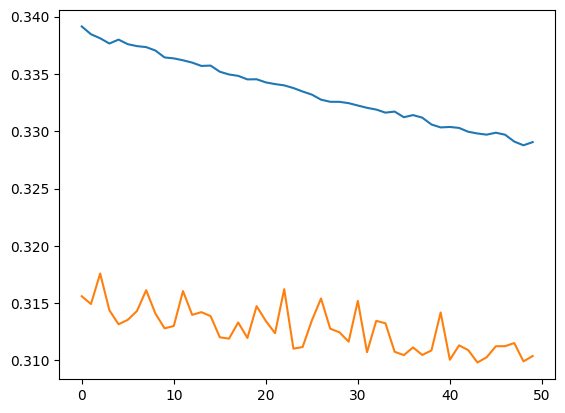

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

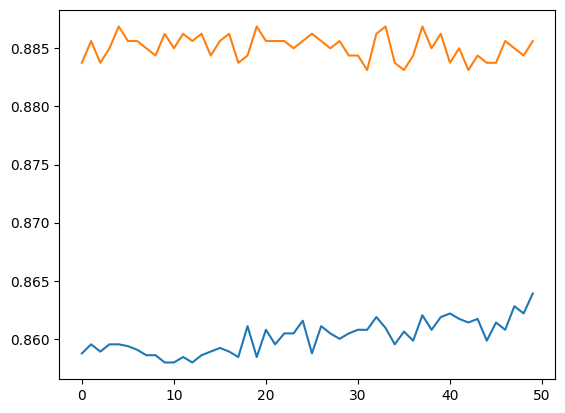

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])